linear regression

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load the data set using pandas
data=pd.read_csv("Advertising.csv")
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
#find out the shape of dataset number of rows and colmns
data.shape

(200, 5)

In [4]:
#find out is their any null values
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [5]:
#describe the data
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
#get the info about dataset where it gives detail information as datatype,data columns,rangeindex etc.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


<Axes: xlabel='TV', ylabel='Sales'>

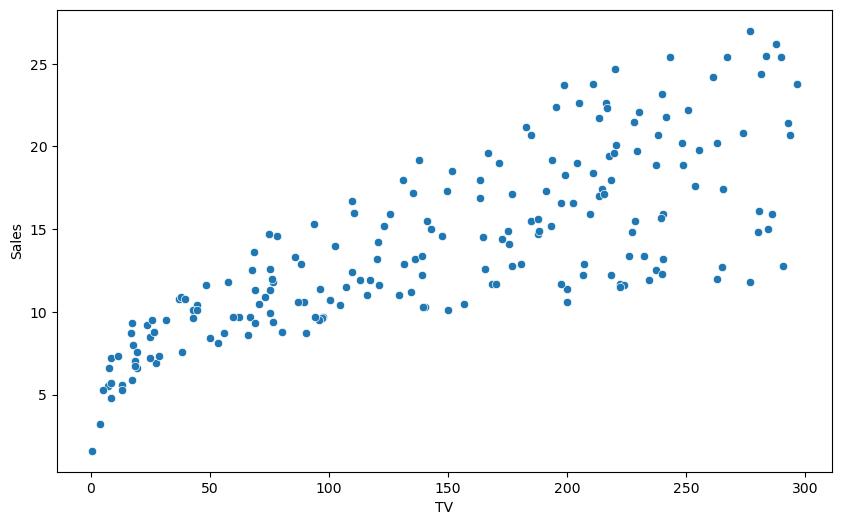

In [7]:
#plot the data to find out the relationships between two variables
plt.figure(figsize=(10,6))
sns.scatterplot(data,x="TV",y="Sales")

In [9]:
# X should be your feature matrix (numpy array or pandas DataFrame)
#let's take TV column as x
x=data[["TV"]].values.reshape(-1,1)

In [10]:
# y should be your target variable (numpy array or pandas Series)
#let's take Sales column as y
y=data[["Sales"]].values.reshape(-1,1)

In [11]:
#print x,y shape
print(x.shape)
print(y.shape)

(200, 1)
(200, 1)


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Split the data into training and testing sets, with 80% of the data for training and 20% for testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
# The 'test_size' parameter determines the proportion of the dataset to include in the test split.
# 'random_state' is used to ensure reproducibility. Setting it to a fixed value will guarantee that the same random split is generated each time the code is run.

In [14]:
#x,y will split into 80% of data for training and 20% fo the data for testing
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 1)
(40, 1)
(160, 1)
(40, 1)


In [44]:
from sklearn.linear_model import LinearRegression
# Create a linear regression model
regration=LinearRegression()
# Train the model using the training sets
regration.fit(x,y)

LinearRegression()

In [45]:
regration.score(x_train,y_train)

0.6827096944837618

In [46]:
# Print regration coefficients
print('Coefficients:',regration.coef_)

Coefficients: [[0.04753664]]


In [47]:
# Print regration intercept
print('Intercept:',regration.intercept_)

Intercept: [7.03259355]


In [48]:
#predict the regration model 
y_predict = regration.predict(x)
y_predict

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431],
       [10.17476548],
       [17.23871025],
       [ 8.16396559],
       [11.66741599],
       [16.73482186],
       [16.32125309],
       [10.25557777],
       [20.40940417],
       [10.32212907],
       [14.03474068],
       [17.41459582],
       [18.31779199],
       [ 7.6600772 ],
       [17.88520856],
       [ 9.99412625],
       [19.52997632],
       [13.82557947],
       [18.44614092],
       [18.85970969],
       [10.38868036],
       [20.95607553],
       [12.39948025],
       [11.653155  ],
       [19.65832525],
       [11.58185004],
       [20.85149492],
       [19.72012288],
       [10.58358059],
       [ 9.08142275],
       [17.87094757],
       [16.65876324],
       [15.44657891],
       [20.98935118],
       [16.86792445],
       [ 8.22576322],
       [15

In [49]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error
mse = mean_squared_error(y, y_predict)
print("Mean Squared Error:", mse)

Mean Squared Error: 10.512652915656759


In [50]:
from sklearn.metrics import r2_score

# Calculate R-squared
r_squared = r2_score(y, y_predict)
print("R-squared:", r_squared)

R-squared: 0.611875050850071


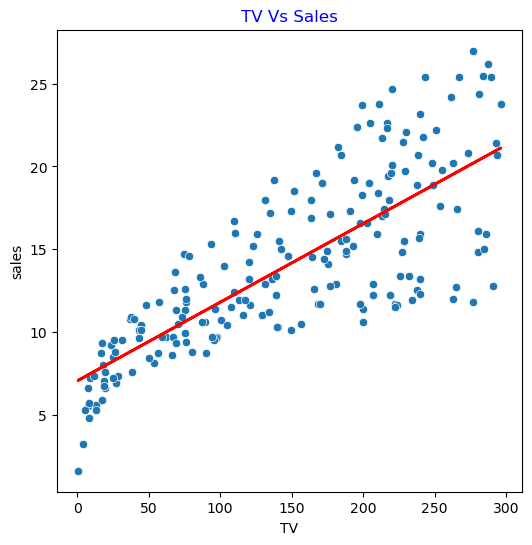

In [51]:
#plotting
plt.figure(figsize=(6,6))
sns.scatterplot(data,x="TV",y="Sales")
#y_predict is the predicted values of sales obtained from a regression model. 
plt.plot(data["TV"],y_predict,c="red",linewidth=2)
plt.xlabel("TV")
plt.ylabel("sales")
plt.title("TV Vs Sales",c="blue")
plt.show()